In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
bs = 64

In [4]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



In [5]:
path = untar_data(URLs.PETS); path

PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet')

In [6]:
path.ls()

[PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/images')]

In [7]:
path_anno = path/'annotations'
path_img = path/'images'

In [8]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/saint_bernard_103.jpg'),
 PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/newfoundland_48.jpg'),
 PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/Bombay_202.jpg'),
 PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/pug_155.jpg'),
 PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/newfoundland_136.jpg')]

In [9]:
np.random.seed(2)
pat = re.compile(r'/([^/]+)_\d+.jpg$')

In [10]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

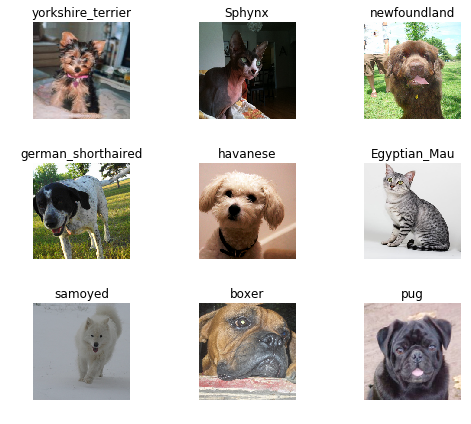

In [11]:
data.show_batch(rows=3, figsize=(7,6))

In [12]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [13]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [14]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.391214,0.345308,0.100812
2,0.550671,0.288436,0.087280
3,0.349379,0.250321,0.083897
4,0.254241,0.236325,0.079161


In [15]:
data

ImageDataBunch;

Train: LabelList
y: CategoryList (5912 items)
[Category saint_bernard, Category newfoundland, Category Bombay, Category leonberger, Category american_pit_bull_terrier]...
Path: /home/ubuntu/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (5912 items)
[Image (3, 334, 500), Image (3, 500, 375), Image (3, 225, 300), Image (3, 375, 500), Image (3, 199, 300)]...
Path: /home/ubuntu/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList
y: CategoryList (1478 items)
[Category shiba_inu, Category samoyed, Category Abyssinian, Category Abyssinian, Category pug]...
Path: /home/ubuntu/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (1478 items)
[Image (3, 332, 500), Image (3, 334, 500), Image (3, 278, 208), Image (3, 500, 333), Image (3, 500, 375)]...
Path: /home/ubuntu/.fastai/data/oxford-iiit-pet/images;

Test: None

In [16]:
learn.save('stage-1')

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

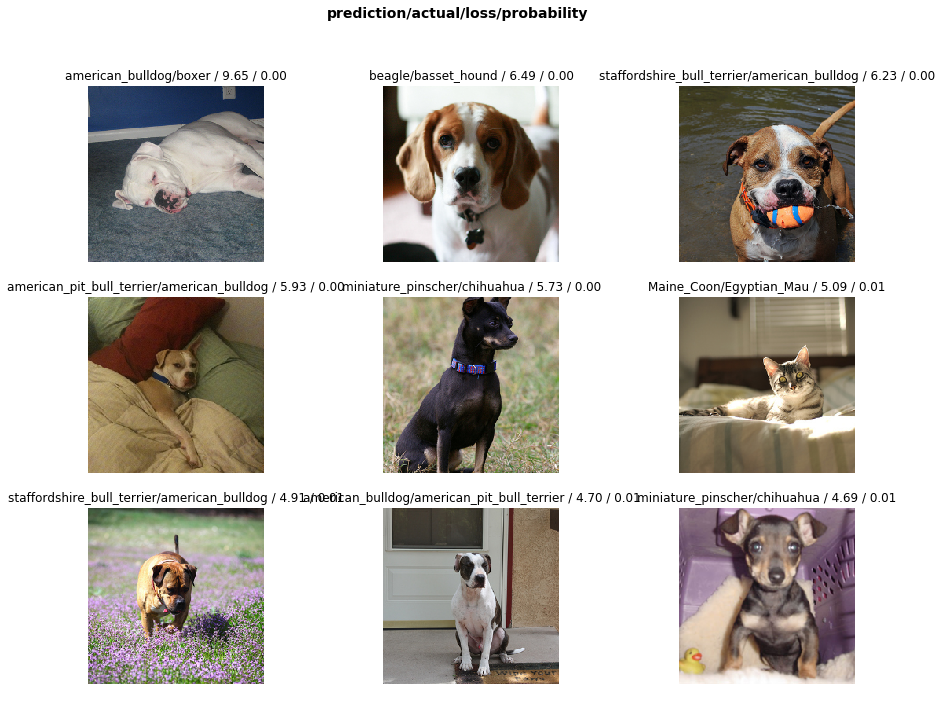

In [18]:
interp.plot_top_losses(9, figsize=(15,11))

In [19]:
doc(interp.plot_top_losses)

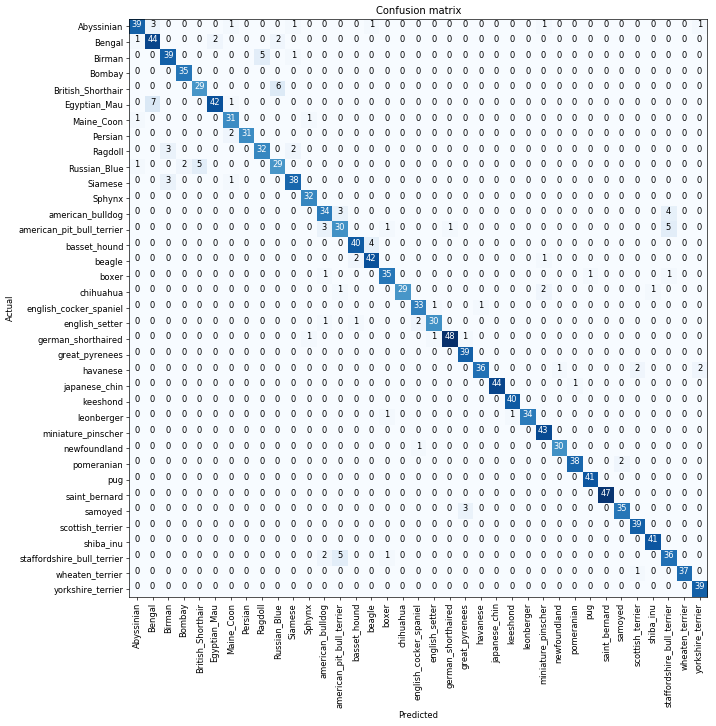

In [20]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [21]:
interp.most_confused(min_val=2)

[('Egyptian_Mau', 'Bengal', 7),
 ('British_Shorthair', 'Russian_Blue', 6),
 ('Birman', 'Ragdoll', 5),
 ('Russian_Blue', 'British_Shorthair', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('american_bulldog', 'staffordshire_bull_terrier', 4),
 ('basset_hound', 'beagle', 4),
 ('Abyssinian', 'Bengal', 3),
 ('Ragdoll', 'Birman', 3),
 ('Siamese', 'Birman', 3),
 ('american_bulldog', 'american_pit_bull_terrier', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('samoyed', 'great_pyrenees', 3)]

In [22]:
learn.unfreeze()

In [23]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,0.558329,0.359179,0.115697


In [24]:
learn.load('stage-1');

In [25]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


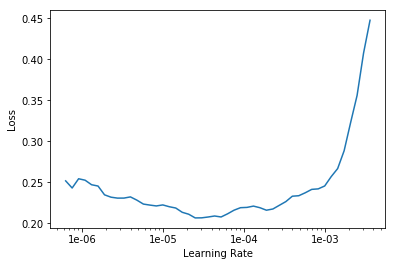

In [26]:
learn.recorder.plot()

In [27]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.230347,0.224216,0.070365
2,0.206358,0.222831,0.069012


In [38]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [39]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


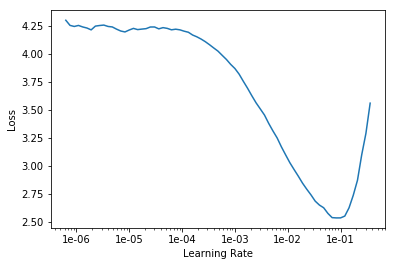

In [40]:
learn.lr_find()
learn.recorder.plot()

In [41]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate
1,0.607710,0.287284,0.080514
2,0.367388,0.255066,0.079161
3,0.243545,0.229622,0.068336
4,0.198075,0.187508,0.059540
5,0.132488,0.178287,0.052774


In [42]:
learn.save('stage-1-50')

In [43]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.130031,0.186959,0.060893
2,0.111832,0.178021,0.055480
3,0.091668,0.168385,0.052774


In [44]:
learn.load('stage-1-50');

In [45]:
interp = ClassificationInterpretation.from_learner(learn)

In [46]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('Egyptian_Mau', 'Bengal', 4),
 ('Ragdoll', 'Birman', 4),
 ('american_bulldog', 'staffordshire_bull_terrier', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('Persian', 'Ragdoll', 3),
 ('basset_hound', 'beagle', 3),
 ('boxer', 'american_bulldog', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3)]